In [12]:
import numpy as np 
import pandas as pd 

import random 
from pprint import pprint 

import Data_vorbereitung as DV 
DP =DV.Data_preparation()



import Random_Forrest_class as RF 
RF_class=RF.Random_Forrest_class()

### Load the Dataset 

In [13]:
df = DP.load_csv_to_df("ricsData_big_v5.csv")
df.head()


,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Anzahl_Ecken,Anzahl_Kreis,innere_Konturen,Label
0,0.288606,0.074919,0.618893,6,1,0,0.716694,0
1,0.494050,0.685185,0.634259,5,7,0,0.163891,0
2,0.497540,0.986384,0.989410,15,8,0,0.169400,0
3,0.480687,0.714286,0.592262,21,6,0,0.085573,0
4,0.322937,0.159763,0.633136,21,3,0,0.038672,0


### Show the distribution over the diffrent classes 

Flaschenoeffner    289
Korkenzieher       276
Dosenoeffner       240
Name: Label, dtype: int64

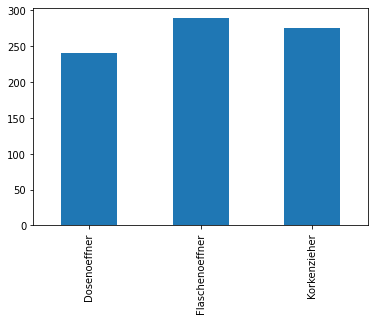

In [14]:
Label = df.Label.value_counts(normalize=False) # count all values in the Label column 
Label = Label.sort_index()  # sort the Labels after their class 

# replace the integer Value of the class with the class name 
def transform_label(value):
    if value==0:
        return"Dosenoeffner"
    elif value ==1:
        return"Flaschenoeffner"
    else:
        return "Korkenzieher"

df["Label"]=df.Label.apply(transform_label)# change the integer to the string value 
Label = df.Label.value_counts(normalize=False)
Label[["Dosenoeffner","Flaschenoeffner","Korkenzieher"]].plot(kind="bar")
Label 

In [15]:
random.seed(0)
train_df, test_df = RF_class.train_test_split(df, test_size=0.2)

In [16]:
def bootstrapping(train_df,n_bootstrap):
    bootstraps_indices =np.random.randint(low=0,high=len(train_df),size=n_bootstrap)
    df_bootstrapped =train_df.iloc[bootstraps_indices]
    
    return df_bootstrapped
    

In [17]:
def random_forrest_algorithm(train_df,n_trees,n_bootstrap,n_features,dt_max_depth):
    forest=[]
    for i in range(n_trees):
        df_bootstrapped=bootstrapping(train_df,n_bootstrap)
        tree=RF_class.decision_tree_algorithm(df_bootstrapped,max_depth=dt_max_depth,random_subspace=n_features)
        forest.append(tree)
    
    return forest


In [18]:
def random_forrest_predictions(test_df,forest):
    df_predictions={}
    for i in range(len(forest)):
        column_name="tree{}".format(i)
        predictions= RF_class.decision_tree_predictions(test_df,tree=forest[i])
        df_predictions[column_name] = predictions
        
        
    df_predictions=pd.DataFrame(df_predictions)
    random_forest_predicitons = df_predictions.mode(axis=1)[0] # return the prediction that appears the most 
    
    return random_forest_predicitons

In [21]:
accuracies=[]

for i in range(10):
    forest=RF_class.random_forrest_algorithm(train_df, n_trees=5,n_bootstrap=600,dt_max_depth=10,n_features=4)
    predictions = RF_class.random_forrest_predictions(test_df,forest) 
    accuracy = RF_class.calculate_accuracy2(predictions,test_df.Label)
    print(accuracy)
    accuracies.append(accuracy)

print("average accuracy: {}".format(np.array(accuracies).mean()))

0.639751552795031
0.6894409937888198
0.6894409937888198
0.7018633540372671
0.6583850931677019
0.6335403726708074
0.7018633540372671
0.6770186335403726
0.6832298136645962
0.5900621118012422
average accuracy: 0.6664596273291925
